# 项目：可视化帕默群岛企鹅数据

## 分析目标

此数据分析报告的目的是对帕默群岛上企鹅样本的相关变量进行可视化，从而探索和分析种类、性别、所在岛屿等因素，与企鹅的身体属性，包括体重、嘴峰长度和深度、鳍的长度，之间的关系。

## 简介

原始数据`Penguins.csv`包括334个收集自南极洲帕尔默群岛的3个岛屿上的企鹅样本，以及企鹅相关属性数据，包括种类名、所在岛、嘴峰长度、嘴峰深度、鳍长度、体重、性别。

`Penguins.csv`每列的含义如下：
- species：企鹅的种类
- island：企鹅所在岛
- culmen_length_mm：企鹅嘴峰的长度（单位为毫米）
- culmen_depth_mm：企鹅嘴峰的深度（单位为毫米）
- flipper_length_mm：企鹅鳍的长度（单位为毫米）
- body_mass_g：企鹅体重（单位为克）
- sex：企鹅性别

## 读取数据

In [111]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [112]:
original_data = pd.read_csv("Penguins.csv")
original_data

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE
...,...,...,...,...,...,...,...
339,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,FEMALE
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,MALE
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,FEMALE


## 评估和整理数据

##### 任务：整齐度和干净度
##### 整齐度：每个变量为一列，每行为一个观察值，每种类型的观察值为一个表格
##### 干净度：丢失数据，重复数据，无效数据（还要注意数据类型和不一致数据）

In [113]:
cleaned_data = original_data.copy()

### 评估数据整齐度

In [114]:
cleaned_data.sample(10)

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
141,Adelie,Dream,40.6,17.2,187.0,3475.0,MALE
74,Adelie,Torgersen,35.5,17.5,190.0,3700.0,FEMALE
246,Gentoo,Biscoe,44.5,14.3,216.0,4100.0,NaN
313,Gentoo,Biscoe,49.5,16.1,224.0,5650.0,MALE
332,Gentoo,Biscoe,43.5,15.2,213.0,4650.0,FEMALE
156,Chinstrap,Dream,52.7,19.8,197.0,3725.0,MALE
103,Adelie,Biscoe,37.8,20.0,190.0,4250.0,MALE
179,Chinstrap,Dream,49.5,19.0,200.0,3800.0,MALE
287,Gentoo,Biscoe,49.5,16.2,229.0,5800.0,MALE
37,Adelie,Dream,42.2,18.5,180.0,3550.0,FEMALE


##### 数据符合“每个变量为一列，每个观察值为一行，每种类型的观察单位为一个表格”，因此不存在结构性问题

### 评估数据干净度

In [115]:
cleaned_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   culmen_length_mm   342 non-null    float64
 3   culmen_depth_mm    342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                334 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


##### 从以上数据来看，culmen_length_mm、culmen_depth_mm、flipper_length_mm、body_mass_g，sex变量存在缺失值
##### 本项目探索和分析种类、性别、所在岛屿等因素，与企鹅的身体属性，包括体重、嘴峰长度和深度、鳍的长度，之间的关系。所以均为重要数据，不可忽视
##### species,island,sex应为category类

##### culmen_length_mm、culmen_depth_mm、flipper_length_mm、body_mass_g这三个变量均为342条，猜测缺失的两条数据各变量均缺失，是无效数据，验证一下

In [116]:
cleaned_data.query("culmen_length_mm.isnull()")

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
339,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN


##### 确认为无效数据，删除

In [117]:
cleaned_data = cleaned_data.dropna(subset=["culmen_length_mm"])
cleaned_data

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,MALE
...,...,...,...,...,...,...,...
338,Gentoo,Biscoe,47.2,13.7,214.0,4925.0,FEMALE
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,FEMALE
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,MALE
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,FEMALE


In [118]:
cleaned_data.query("sex.isnull()")

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
8,Adelie,Torgersen,34.1,18.1,193.0,3475.0,NaN
9,Adelie,Torgersen,42.0,20.2,190.0,4250.0,NaN
10,Adelie,Torgersen,37.8,17.1,186.0,3300.0,NaN
11,Adelie,Torgersen,37.8,17.3,180.0,3700.0,NaN
47,Adelie,Dream,37.5,18.9,179.0,2975.0,NaN
246,Gentoo,Biscoe,44.5,14.3,216.0,4100.0,NaN
286,Gentoo,Biscoe,46.2,14.4,214.0,4650.0,NaN
324,Gentoo,Biscoe,47.3,13.8,216.0,4725.0,NaN


##### 缺失性别变量的观察值具备其它数据，仍然可以为分析提供价值。由于Pandas以及Matplotlib、Seaborn会自动忽略缺失值，可以保留这些行。

In [119]:
cleaned_data["sex"] = cleaned_data["sex"].astype("category")
cleaned_data["sex"]

0        MALE
1      FEMALE
2      FEMALE
4      FEMALE
5        MALE
        ...  
338    FEMALE
340    FEMALE
341      MALE
342    FEMALE
343      MALE
Name: sex, Length: 342, dtype: category
Categories (3, object): ['.', 'FEMALE', 'MALE']

In [120]:
cleaned_data["species"] = cleaned_data["species"].astype("category")
cleaned_data["species"]

0      Adelie
1      Adelie
2      Adelie
4      Adelie
5      Adelie
        ...  
338    Gentoo
340    Gentoo
341    Gentoo
342    Gentoo
343    Gentoo
Name: species, Length: 342, dtype: category
Categories (3, object): ['Adelie', 'Chinstrap', 'Gentoo']

In [121]:
cleaned_data["island"] = cleaned_data["island"].astype("category")
cleaned_data["island"]

0      Torgersen
1      Torgersen
2      Torgersen
4      Torgersen
5      Torgersen
         ...    
338       Biscoe
340       Biscoe
341       Biscoe
342       Biscoe
343       Biscoe
Name: island, Length: 342, dtype: category
Categories (3, object): ['Biscoe', 'Dream', 'Torgersen']

In [122]:
cleaned_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 342 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   species            342 non-null    category
 1   island             342 non-null    category
 2   culmen_length_mm   342 non-null    float64 
 3   culmen_depth_mm    342 non-null    float64 
 4   flipper_length_mm  342 non-null    float64 
 5   body_mass_g        342 non-null    float64 
 6   sex                334 non-null    category
dtypes: category(3), float64(4)
memory usage: 14.7 KB


##### 修改类型完成

##### 检查是否有重复数据

In [123]:
cleaned_data.duplicated()

0      False
1      False
2      False
4      False
5      False
       ...  
338    False
340    False
341    False
342    False
343    False
Length: 342, dtype: bool

In [124]:
duplicated_rows = cleaned_data[cleaned_data.duplicated()]#布尔索引找重复行
duplicated_rows

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex


##### 没有重复行，其实对于这个项目来说有也不影响

##### 检查有没有无效数据错误数据

In [125]:
cleaned_data.describe()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g
count,342.000000,342.000000,342.000000,342.000000
mean,43.921930,17.151170,200.915205,4201.754386
std,5.459584,1.974793,14.061714,801.954536
min,32.100000,13.100000,172.000000,2700.000000
25%,39.225000,15.600000,190.000000,3550.000000
50%,44.450000,17.300000,197.000000,4050.000000
75%,48.500000,18.700000,213.000000,4750.000000
max,59.600000,21.500000,231.000000,6300.000000


无错误

检查有无不一致数据（不同值实际指代同一目标）

In [126]:
cleaned_data["species"].value_counts()

species
Adelie       151
Gentoo       123
Chinstrap     68
Name: count, dtype: int64

In [127]:
cleaned_data["island"].value_counts()

island
Biscoe       167
Dream        124
Torgersen     51
Name: count, dtype: int64

In [128]:
cleaned_data["sex"].value_counts()

sex
MALE      168
FEMALE    165
.           1
Name: count, dtype: int64

从以上输出来看，`species`和`island`列里并不存在不一致数据，但`sex`列里存在一个英文句号值，并不代表任何有效性别，Pandas以及Matplotlib、Seaborn会自动忽略缺失值,但不会忽略句号，会对图表造成干扰，我们应当把该值替换为`NaN`空值

In [129]:
cleaned_data["sex"] = cleaned_data["sex"].replace(".",np.nan)

C:\Users\杨若敏\AppData\Local\Temp\ipykernel_23968\834441773.py:1: FutureWarning: The behavior of Series.replace (and DataFrame.replace) with CategoricalDtype is deprecated. In a future version, replace will only be used for cases that preserve the categories. To change the categories, use ser.cat.rename_categories instead.
  cleaned_data["sex"] = cleaned_data["sex"].replace(".",np.nan)


## 数据探索

##### 开始绘图前，可以先设置色盘，设置完成后，后面的表格都会用这个色盘

In [130]:
sns.set_palette("pastel")

In [131]:
cleaned_data

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,MALE
...,...,...,...,...,...,...,...
338,Gentoo,Biscoe,47.2,13.7,214.0,4925.0,FEMALE
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,FEMALE
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,MALE
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,FEMALE


### 企鹅种类的比例

##### 针对species,island,sex这三个分类变量，可以用饼图来看各自的占比

In [132]:
species_count = cleaned_data["species"].value_counts()
species_count

species
Adelie       151
Gentoo       123
Chinstrap     68
Name: count, dtype: int64

([<matplotlib.patches.Wedge at 0x222fd3c79d0>,
 [Text(0.20095570279004357, 1.0814882364206093, 'Adelie'),
  Text(-0.7954730250570456, -0.7597517136582143, 'Gentoo'),
  Text(0.892288738448971, -0.6432890541872635, 'Chinstrap')],
 [Text(0.10961220152184194, 0.5899026744112414, '44%'),
  Text(-0.433894377303843, -0.41441002563175316, '36%'),
  Text(0.48670294824489324, -0.3508849386475982, '20%')])

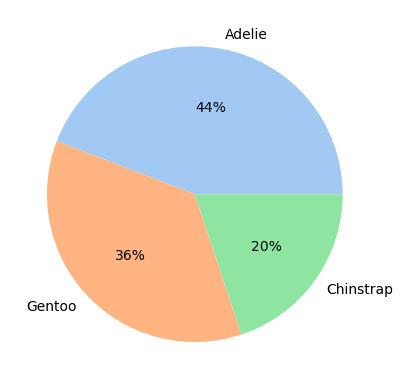

In [133]:
plt.pie(species_count,autopct="%.0f%%",labels=species_count.index)

由图得知，样本中`Adelie`这个种类的企鹅占比最大，`Gentoo`种类的占比次之，`Chinstrap`的占比最小，为1/5左右。

### 企鹅所属岛屿的比例

In [134]:
island_count = cleaned_data["island"].value_counts()
island_count

island
Biscoe       167
Dream        124
Torgersen     51
Name: count, dtype: int64

([<matplotlib.patches.Wedge at 0x22283b68550>,
 [Text(0.040408993903112124, 1.0992575281578645, 'Biscoe'),
  Text(-0.5324063168406664, -0.9625713032228604, 'Dream'),
  Text(0.9814795839173, -0.49668684938653646, 'Torgersen')],
 [Text(0.022041269401697518, 0.5995950153588351, '49%'),
  Text(-0.2904034455494544, -0.5250388926670148, '36%'),
  Text(0.5353525003185272, -0.2709200996653835, '15%')])

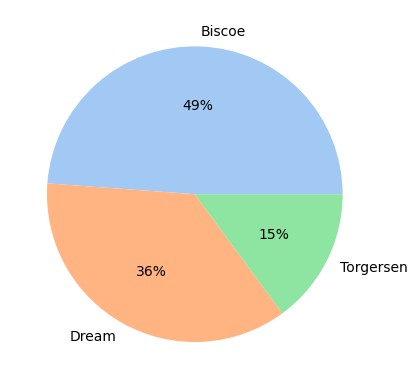

In [135]:
plt.pie(island_count,autopct="%.0f%%",labels=island_count.index)

样本中一半左右的企鹅样本都来自`Biscoe`岛屿，占比最大，其次是`Dream`岛屿，来自`Torgersen`岛屿的样本最少。

### 企鹅性别比例

In [136]:
sex_count = cleaned_data["sex"].value_counts()
sex_count

sex
MALE      168
FEMALE    165
Name: count, dtype: int64

([<matplotlib.patches.Wedge at 0x222fd3f47d0>,
 [Text(-0.01556599676421093, 1.0998898580061263, 'MALE'),
  Text(0.015565699568373776, -1.0998898622120976, 'FEMALE')],
 [Text(-0.008490543689569597, 0.5999399225487961, '50%'),
  Text(0.008490381582749331, -0.5999399248429623, '50%')])

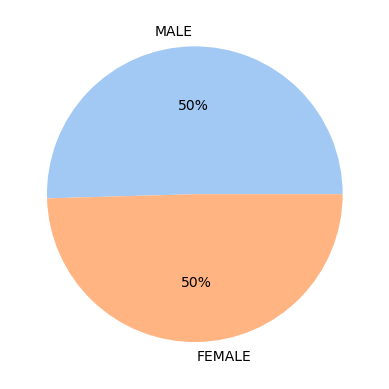

In [137]:
plt.pie(sex_count,autopct="%.0f%%",labels=sex_count.index)

样本企鹅的性别占比持平，符合随机抽样。

### 不同岛上的企鹅种类

<Axes: xlabel='island', ylabel='count'>

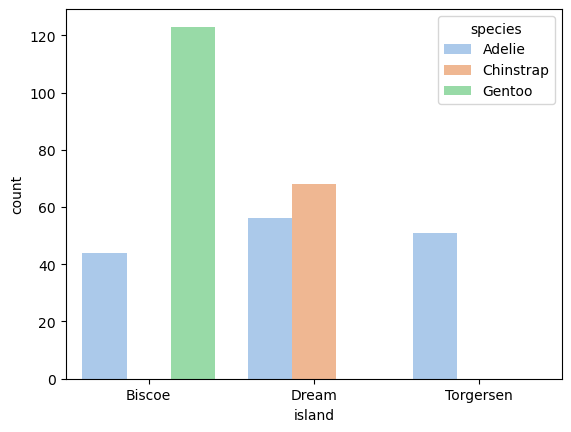

In [140]:
sns.countplot(cleaned_data,x="island",hue="species")

从以上可以看出，Adelie种类的企鹅样本在Biscoe、Dream、Torgersen这三个岛上都有，而Chinstrap种类只在Dream岛上才有，Gentoo只在Biscoe岛上才有。

### 不同岛屿上的企鹅性别数量

<Axes: xlabel='island', ylabel='count'>

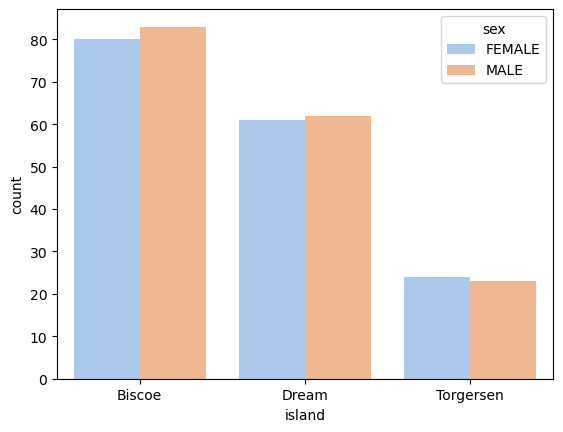

In [141]:
sns.countplot(cleaned_data,x="island",hue="sex")

### 数值间的关系

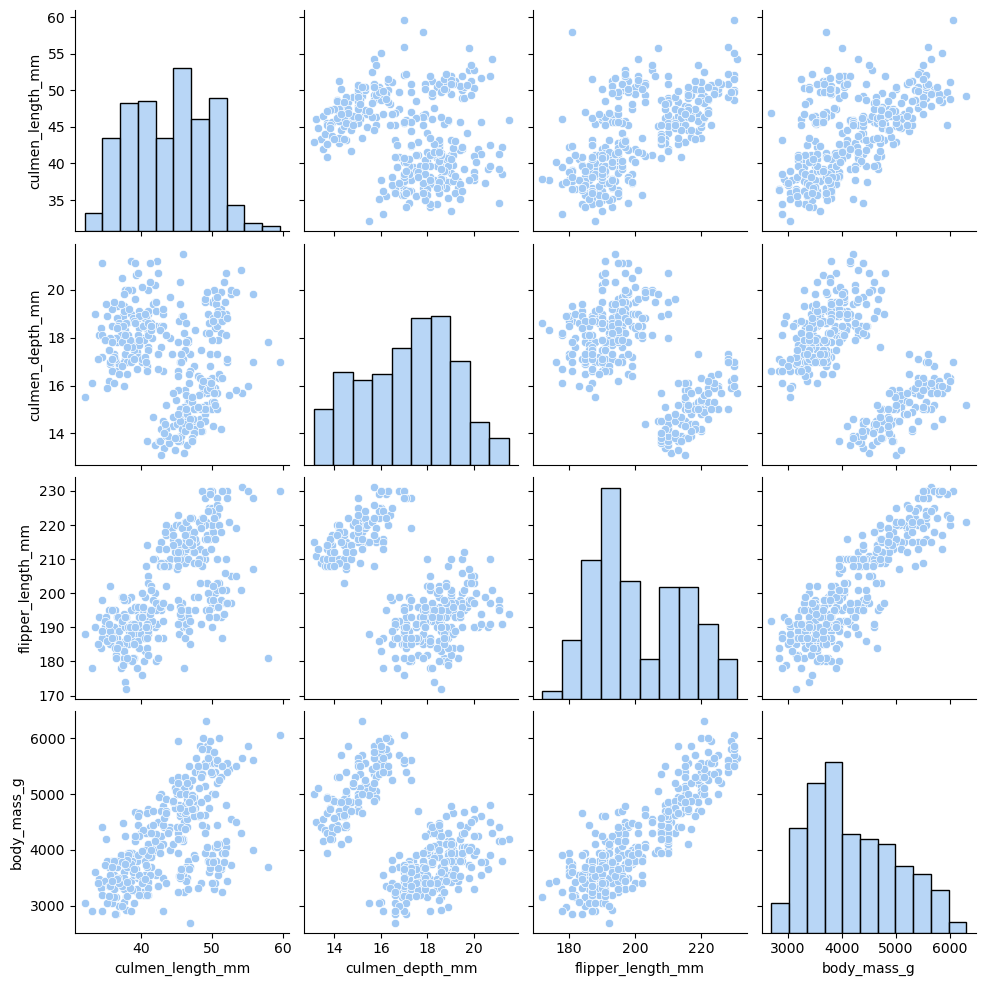

In [142]:
sns.pairplot(cleaned_data)

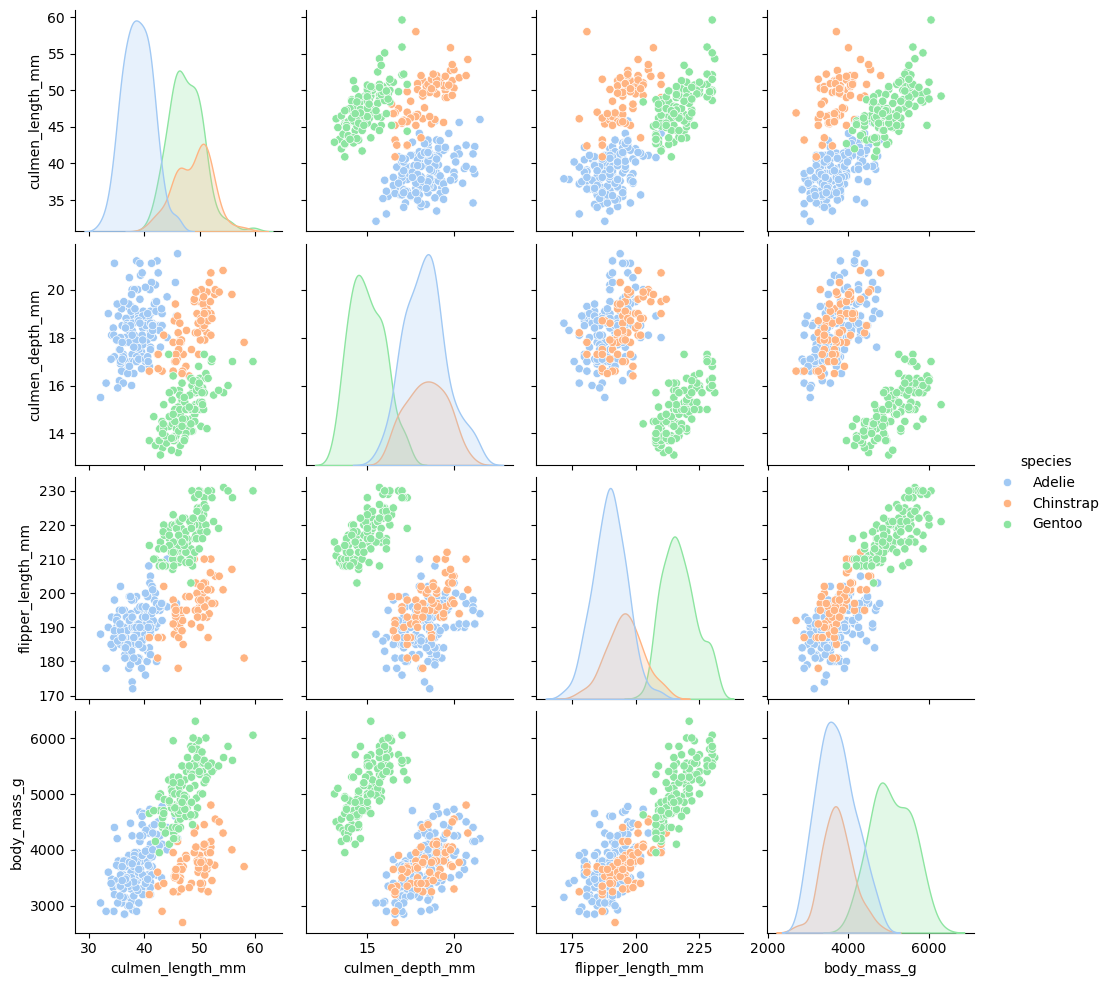

In [143]:
sns.pairplot(cleaned_data,hue="species")

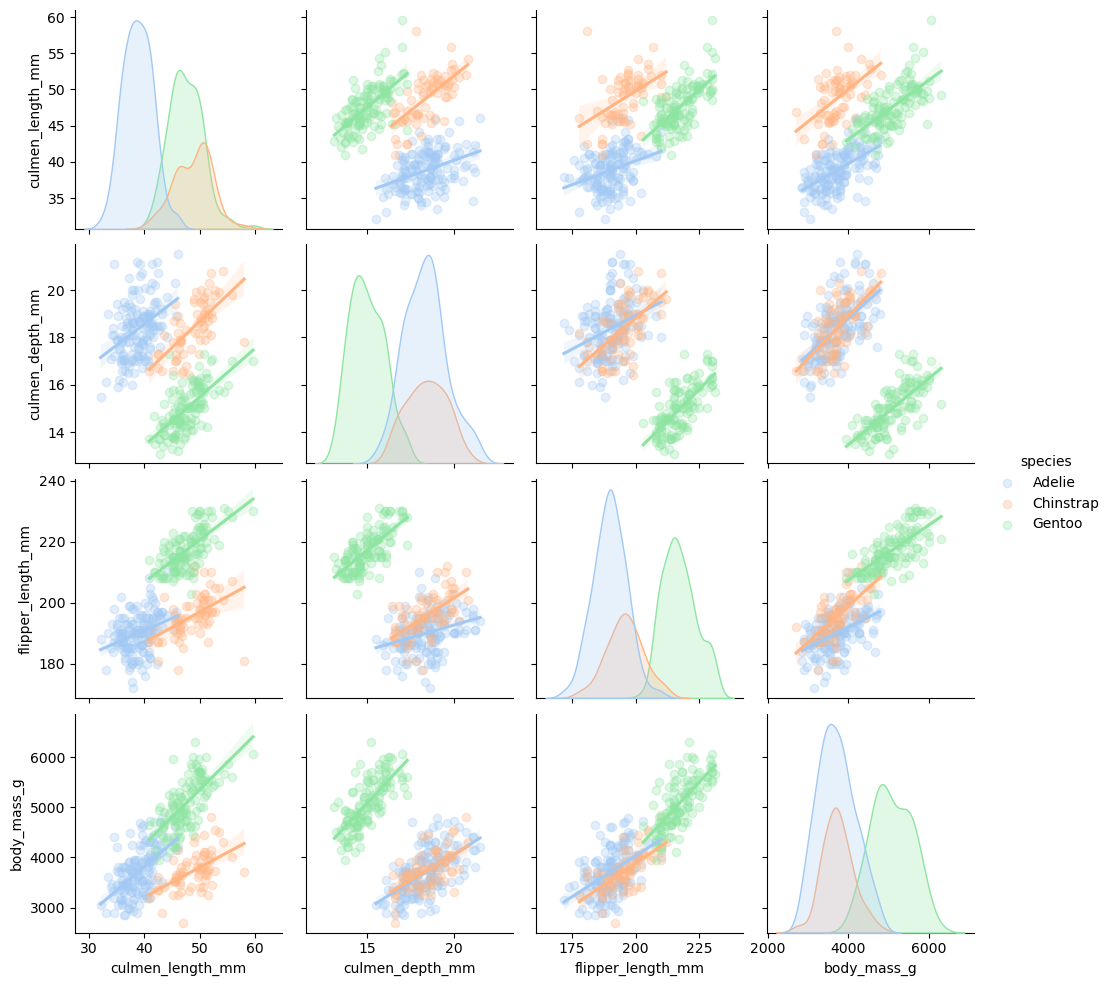

In [145]:
sns.pairplot(cleaned_data,hue="species",kind="reg",plot_kws = {"scatter_kws":{"alpha":0.3}})#reg是回归线，看线性关系,调整点的透明度，使线更明显
#alpha参数用来调整透明度，区间是0到1，单表修改透明度可以直接写，eg:alpha=0.3 .但多表就需要用到字典说明是哪个表

类企鹅的属性数据之间均呈线性正比，即嘴峰越长，嘴峰越深，鳍越长，体重越重，嘴峰越短，嘴峰越浅，鳍越短，体重越轻。